# Feature Engineering


## 1. Neighborhood Desiriability

There are 25 values in the Neighborhood column, which is more than I want to encode as onehot. They also seem to have a strong association with the target variable, which means I don't want to drop them. I decided to create a new ordinal feature, NeighborhoodDesirability, based on the quartile of the overall sale price that the mean house price of the neighborhood falls into: 0 = <25%ile, 1 = 25-50%ile, 2 = 50-75%ile 3 = >75%ile

In [1]:
import pandas as pd
import numpy as np

In [2]:
ames = pd.read_pickle('../datasets/pickles/pickled_train.csv.pkl')
amesTest = pd.read_pickle('../datasets/pickles/pickled_test.csv.pkl')
dfs = [ames, amesTest]
neighs = ames[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean('SalePrice').reset_index().copy()
neighs['Neighborhood' ] = neighs['Neighborhood'].apply(lambda x : str(x))
p25 = np.percentile(ames['SalePrice'], 25)
p75 = np.percentile(ames['SalePrice'], 75)
mean = ames['SalePrice'].mean()

I'm sure there's a more elegant way to do this, but I'll need to declare these variables explicitly in the "BK Changes" book and this is simple

In [3]:
# https://www.delftstack.com/howto/python-pandas/pandas-column-to-list/ showed me the tolist() menthod
display(neighs.loc[neighs['SalePrice'] < p25]['Neighborhood'])
display(neighs.loc[neighs['SalePrice'] < mean]['Neighborhood'])
display(neighs.loc[neighs['SalePrice'] < p75]['Neighborhood'])
display(neighs.loc[neighs['SalePrice'] > p75]['Neighborhood'])

2      BrDale
3     BrkSide
11     IDOTRR
13    MeadowV
20    OldTown
Name: Neighborhood, dtype: object

1     Blueste
2      BrDale
3     BrkSide
7     Edwards
11     IDOTRR
12    Landmrk
13    MeadowV
14    Mitchel
15      NAmes
16    NPkVill
20    OldTown
21      SWISU
22     Sawyer
Name: Neighborhood, dtype: object

0     Blmngtn
1     Blueste
2      BrDale
3     BrkSide
5     CollgCr
6     Crawfor
7     Edwards
8     Gilbert
9      Greens
11     IDOTRR
12    Landmrk
13    MeadowV
14    Mitchel
15      NAmes
16    NPkVill
17     NWAmes
20    OldTown
21      SWISU
22     Sawyer
23    SawyerW
Name: Neighborhood, dtype: object

4     ClearCr
10    GrnHill
18    NoRidge
19    NridgHt
24    Somerst
25    StoneBr
26     Timber
27    Veenker
Name: Neighborhood, dtype: object

In [4]:
display(neighs.loc[(neighs['SalePrice'] < mean) & (neighs['SalePrice'] >= p25)]['Neighborhood'])

1     Blueste
7     Edwards
12    Landmrk
14    Mitchel
15      NAmes
16    NPkVill
21      SWISU
22     Sawyer
Name: Neighborhood, dtype: object

In [5]:
neighs_1 = [ 'Blueste','Edwards','Landmrk', 'Mitchel', 'NAmes', 'NPkVill', 'SWISU', 'Sawyer']

In [6]:
display(neighs.loc[(neighs['SalePrice'] >= mean) & (neighs['SalePrice'] <p75)]['Neighborhood'])

0     Blmngtn
5     CollgCr
6     Crawfor
8     Gilbert
9      Greens
17     NWAmes
23    SawyerW
Name: Neighborhood, dtype: object

In [7]:
neighs_2 = ['Blmngtn', 'CollgCr', 'Crawfor', 'Gilbert','Greens', 'NWAmes', 'SawyerW']

In [8]:
display(neighs.loc[(neighs['SalePrice'] >= p75)]['Neighborhood'])

4     ClearCr
10    GrnHill
18    NoRidge
19    NridgHt
24    Somerst
25    StoneBr
26     Timber
27    Veenker
Name: Neighborhood, dtype: object

In [9]:
neighs_3 = ['ClearCr', 'GrnHill', 'NoRidge', 'NridgHt','Somerst','StoneBr','Timber','Veenker']
ames.loc[ames['Neighborhood'].isin(neighs_1), 'NeighborhoodScore'] = 1
ames.loc[ames['Neighborhood'].isin(neighs_2), 'NeighborhoodScore'] = 2
ames.loc[ames['Neighborhood'].isin(neighs_3), 'NeighborhoodScore'] = 3
ames[['Neighborhood', 'NeighborhoodScore']].head(20)

,Neighborhood,NeighborhoodScore
0,Sawyer,1.0
1,SawyerW,2.0
2,NAmes,1.0
3,Timber,3.0
4,SawyerW,2.0
5,NAmes,1.0
6,Edwards,1.0
7,NAmes,1.0
8,OldTown,NaN
9,NAmes,1.0


In [10]:
neighs_3 = ['ClearCr','GrnHill', 'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', 'Timber', 'Veenker']

In [11]:
ames['NeighborhoodScore']=0

In [12]:
amesTest['NeighborhoodScore'] = 0
amesTest.loc[amesTest['Neighborhood'].isin(neighs_1), 'NeighborhoodScore'] = 1
amesTest.loc[amesTest['Neighborhood'].isin(neighs_2), 'NeighborhoodScore'] = 2
amesTest.loc[amesTest['Neighborhood'].isin(neighs_3), 'NeighborhoodScore'] = 3
amesTest[['Neighborhood', 'NeighborhoodScore']].head(20)

,Neighborhood,NeighborhoodScore
0,OldTown,0
1,Sawyer,1
2,Gilbert,2
3,OldTown,0
4,NAmes,1
5,MeadowV,0
6,OldTown,0
7,CollgCr,2
8,Somerst,3
9,Mitchel,1


In [13]:
ames['NeighborhoodScore'] = 0
ames.loc[ames['Neighborhood'].isin(neighs_1), 'NeighborhoodScore'] = 1
ames.loc[ames['Neighborhood'].isin(neighs_2), 'NeighborhoodScore'] = 2
ames.loc[ames['Neighborhood'].isin(neighs_3), 'NeighborhoodScore'] = 3
ames[['Neighborhood', 'NeighborhoodScore']].head(20)

,Neighborhood,NeighborhoodScore
0,Sawyer,1
1,SawyerW,2
2,NAmes,1
3,Timber,3
4,SawyerW,2
5,NAmes,1
6,Edwards,1
7,NAmes,1
8,OldTown,0
9,NAmes,1


## MS Zoning
Based on my EDA, I'm going to convert MS Zoning into a simpler isResidential column

In [14]:
ames['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [15]:
res = ['RL', 'RM', 'FV', 'RH']

In [16]:
ames['isResidential'] = (ames['MS Zoning'].isin(res))*1

In [17]:
ames[['MS Zoning']].value_counts()

MS Zoning
RL           1598
RM            316
FV            101
C (all)        19
RH             14
A (agr)         2
I (all)         1
dtype: int64

In [18]:
ames[['isResidential']].value_counts()

isResidential
1                2029
0                  22
dtype: int64

In [19]:
amesTest['isResidential'] = (amesTest['MS Zoning'].isin(res))*1

Sums match

In [20]:
ames.drop('MS Zoning',1, inplace = True)


In [21]:
amesTest.drop('MS Zoning', 1, inplace = True)

# Condition 1
I'll reduce dimensionality by combining the features called "positive" and the ones mentioning railroads into PosA and RR respective;y. The price values were pretty close across these catagories, so I think that's justified. This turns 8 unique values to 4.

In [22]:
ames['Condition 1'].replace('PosA', 'PosN', inplace = True)
amesTest['Condition 1'].replace('PosA', 'PosN', inplace = True)

In [23]:
ames['Condition 1'].replace('RRNn', 'RR', inplace = True)
ames['Condition 1'].replace('RRAn', 'RR', inplace = True)
ames['Condition 1'].replace('RRNe', 'RR', inplace = True)
ames['Condition 1'].replace('RRAe', 'RR', inplace = True)

In [24]:
amesTest['Condition 1'].replace('RRNn', 'RR', inplace = True)
amesTest['Condition 1'].replace('RRAn', 'RR', inplace = True)
amesTest['Condition 1'].replace('RRNe', 'RR', inplace = True)
amesTest['Condition 1'].replace('RRAe', 'RR', inplace = True)

# Roof Style and Roof Matl

As I predicted, not all combinationsof roof styles and roof materials were present in my dataset (see EDA notbook). I'll combine them to reduce my dimensionality a by 21 features (6 roof styles * 6 roof materials) vs 15 combinations.

In [25]:
ames['roof'] = ames['Roof Style'] + ames['Roof Matl']


In [26]:
ames.drop('Roof Style', 1, inplace = True)

In [27]:
ames.drop('Roof Matl', 1, inplace = True)

In [28]:
amesTest['roof'] = amesTest['Roof Style'] + amesTest['Roof Matl']

In [29]:
amesTest.drop('Roof Style', 1, inplace = True)
amesTest.drop('Roof Matl', 1, inplace = True)

## One Hot

For the purpose of modeling, I sometimes transformed all catagorical data to one hot, these are features I found particularly interesting
### SaleType

In [30]:
ames = pd.get_dummies(data = ames, columns = ['Sale Type'], drop_first = True, prefix = 'Sale Type_')
amesTest = pd.get_dummies(data = amesTest, columns = ['Sale Type'], drop_first = True, prefix = 'Sale Type_')

In [31]:
## Central air

In [32]:
ames['Central Air'].replace('Y', 1, inplace = True)
ames['Central Air'].replace('N', 0, inplace = True)


In [33]:
amesTest['Central Air'].replace('Y', 1, inplace = True)
amesTest['Central Air'].replace('N', 0, inplace = True)


## Street
Changed to 1 hot "is paved"

In [34]:
ames['Street'].replace('Pave', 1, inplace = True)
amesTest['Street'].replace('Grvl', 0, inplace = True)

In [35]:
amesTest.rename(columns = {'Street':'isPaved'}, inplace = True)

# Drops
The following catagories were dropeed because all but 20 or fewer observations were in the same category, there was not enpugh of a relationship between this category snd sale price  to justify the extra dimensionality, it was already accounted for by new features or similar 

In [36]:
# Utilities: all but 2 houses are in the same catagory so I'll drop it
ames.drop('Utilities', 1, inplace = True)
amesTest.drop('Utilities', 1, inplace = True)

In [37]:
# condition 2
ames.drop('Condition 2', 1, inplace = True)
amesTest.drop('Condition 2', 1, inplace = True)

In [38]:
ames['Alley'].unique()

array(['None', 'Pave', 'Grvl'], dtype=object)

In [39]:
ames.drop('Land Slope', 1, inplace = True)
amesTest.drop('Land Slope', 1, inplace = True)

In [40]:
ames.drop('Alley', 1, inplace = True)
amesTest.drop('Alley', 1, inplace = True)

In [41]:
ames.drop('Id',1 ,inplace = True)
ames.drop('PID',1, inplace = True )
ames.drop('Neighborhood', 1, inplace = True)

In [42]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MS SubClass        2051 non-null   int64 
 1   Lot Frontage       2051 non-null   object
 2   Lot Area           2051 non-null   int64 
 3   Street             2051 non-null   object
 4   Lot Shape          2051 non-null   object
 5   Land Contour       2051 non-null   object
 6   Lot Config         2051 non-null   object
 7   Condition 1        2051 non-null   object
 8   Bldg Type          2051 non-null   object
 9   House Style        2051 non-null   object
 10  Overall Qual       2051 non-null   int64 
 11  Overall Cond       2051 non-null   int64 
 12  Year Built         2051 non-null   int64 
 13  Year Remod/Add     2051 non-null   int64 
 14  Exterior 1st       2051 non-null   object
 15  Exterior 2nd       2051 non-null   object
 16  Mas Vnr Type       2051 non-null   object


# Exteriors
Exter Qual and Exter Cond are ordinal and need to be fixed. I'm going to try an Exter Qual vs Exter Cond product column and I think a percentile ordinal score is a good strategy for the material columns, which would add another 30 columns as onehot

In [43]:
to_numeric= {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}
ames['Exter Qual'] = ames['Exter Qual'].replace(to_numeric)
amesTest['Exter Qual'] = amesTest['Exter Qual'].replace(to_numeric)


In [44]:
to_numeric= {'Po': 0, 'Fa':1, 'Gd':2, 'TA':3, 'Ex':4}
ames['Exter Cond'] = ames['Exter Cond'].replace(to_numeric)
amesTest['Exter Cond'] = amesTest['Exter Cond'].replace(to_numeric)


In [45]:
Ex1 = ames[['Exterior 1st', 'SalePrice']].groupby('Exterior 1st').mean('SalePrice').reset_index().copy()
p25 = np.percentile(ames['SalePrice'], 25)
p75 = np.percentile(ames['SalePrice'], 75)
mean = ames['SalePrice'].mean()


In [46]:
display(Ex1.loc[Ex1['SalePrice'] < p25]['Exterior 1st'])
ex0 = ['AsbShng','AsphShn', 'Cblock']

0    AsbShng
1    AsphShn
4     CBlock
Name: Exterior 1st, dtype: object

In [47]:
display(Ex1.loc[(Ex1['SalePrice'] < mean) & (Ex1['SalePrice'] >= p25)]['Exterior 1st'])
ex1 = ['BrkComm', 'HdBoard', 'MetalSd','Plywood','Stucco','Wd Sdng','WdShing']

2     BrkComm
6     HdBoard
8     MetalSd
9     Plywood
11     Stucco
13    Wd Sdng
14    WdShing
Name: Exterior 1st, dtype: object

In [48]:
display(Ex1.loc[(Ex1['SalePrice'] >= mean) & (Ex1['SalePrice'] < p75)]['Exterior 1st'])
ex2 =['BrkFace']

3    BrkFace
Name: Exterior 1st, dtype: object

In [49]:
display(Ex1.loc[Ex1['SalePrice'] >= p75]['Exterior 1st'])
ex3 = ['CemntBd','ImStucc','Stone','VinylSd']

5     CemntBd
7     ImStucc
10      Stone
12    VinylSd
Name: Exterior 1st, dtype: object

In [50]:
ames['Ex1Score'] = 0
ames.loc[ames['Exterior 1st'].isin(ex1), 'Exterior 1st'] = 1
ames.loc[ames['Exterior 1st'].isin(ex2), 'Exterior 1st'] = 2
ames.loc[ames['Exterior 1st'].isin(ex3), 'Exterior 1st'] = 3

In [51]:
amesTest.loc[ames['Exterior 1st'].isin(ex1), 'Exterior 1st'] = 1
amesTest.loc[ames['Exterior 1st'].isin(ex2), 'Exterior 1st'] = 2
amesTest.loc[ames['Exterior 1st'].isin(ex3), 'Exterior 1st'] = 3

In [52]:
ames.drop('Exterior 1st',1, inplace = True)

In [53]:
Ex2 = ames[['Exterior 2nd', 'SalePrice']].groupby('Exterior 2nd').mean('SalePrice').reset_index().copy()


In [54]:
display(Ex2.loc[Ex2['SalePrice'] < p25]['Exterior 2nd'])
ex20 = ['AsbShng', 'CBlock']

0    AsbShng
4     CBlock
Name: Exterior 2nd, dtype: object

In [55]:
display(Ex2.loc[(Ex2['SalePrice'] < mean) & (Ex2['SalePrice'] >= p25)]['Exterior 2nd'])
ex21 = ['AsphShn', 'Brk Cmn', 'HdBoard', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'Wd Sdng', 'Wd Shng']

1     AsphShn
2     Brk Cmn
6     HdBoard
8     MetalSd
9     Plywood
10      Stone
11     Stucco
13    Wd Sdng
14    Wd Shng
Name: Exterior 2nd, dtype: object

In [56]:
display(Ex2.loc[(Ex2['SalePrice'] >= mean) & (Ex2['SalePrice'] < p75)]['Exterior 2nd'])
ex22 =  ['BrkFace']

3    BrkFace
Name: Exterior 2nd, dtype: object

In [57]:
ex23 = display(Ex2.loc[Ex2['SalePrice'] >= p75]['Exterior 2nd'])

ex23 = ['CmentBd', 'ImStucc', 'VinylSd']


5     CmentBd
7     ImStucc
12    VinylSd
Name: Exterior 2nd, dtype: object

In [58]:
ames['Ex2Score'] = 0
ames.loc[ames['Exterior 2nd'].isin(ex21), 'Exterior 2nd'] = 1
ames.loc[ames['Exterior 2nd'].isin(ex22), 'Exterior 2nd'] = 2
ames.loc[ames['Exterior 2nd'].isin(ex23), 'Exterior 2nd'] = 3

In [59]:
amesTest['Ex2Score'] = 0
amesTest.loc[amesTest['Exterior 2nd'].isin(ex21), 'Exterior 2nd'] = 1
amesTest.loc[amesTest['Exterior 2nd'].isin(ex22), 'Exterior 2nd'] = 2
amesTest.loc[amesTest['Exterior 2nd'].isin(ex23), 'Exterior 2nd'] = 3

In [60]:
ames.drop('Exterior 2nd', 1, inplace = True)

In [61]:
amesTest.drop('Exterior 2nd', 1, inplace = True)

In [62]:
Exprod = ames[['Exter Cond', 'Exter Qual', 'SalePrice']]

<AxesSubplot:xlabel='Exter Cond', ylabel='SalePrice'>

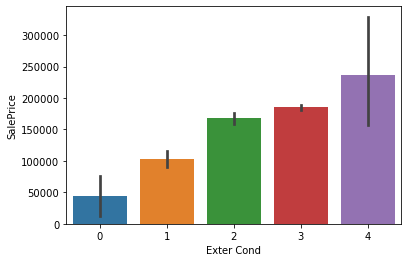

In [63]:
import seaborn as sns
sns.barplot(data = Exprod, x = 'Exter Cond', y = 'SalePrice')

<AxesSubplot:xlabel='Exter Qual', ylabel='SalePrice'>

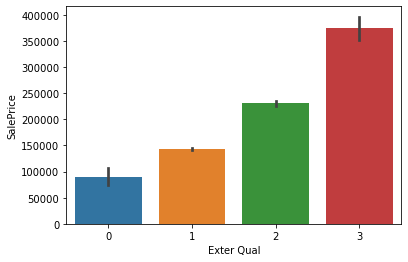

In [64]:
sns.barplot(data = Exprod, x = 'Exter Qual', y = 'SalePrice')

In [65]:
Exprod['Product'] = Exprod['Exter Qual'] * Exprod['Exter Cond']

<ipython-input-65-c22e5107d24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exprod['Product'] = Exprod['Exter Qual'] * Exprod['Exter Cond']


<AxesSubplot:xlabel='Product', ylabel='SalePrice'>

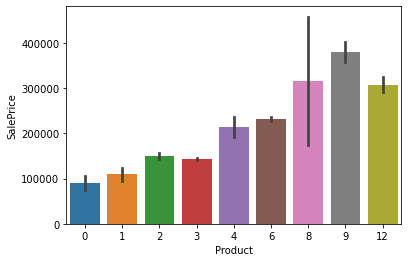

In [66]:
sns.barplot(data = Exprod, x = 'Product', y = 'SalePrice')

I like the product: I'll use it in my model which means I'll drop Exter 1 and Exter 2

In [67]:
ames['Exter Qual * Cond']= ames['Exter Qual'] * ames['Exter Cond']
#amesTest['Exter Qual * Cond']= amesTest['Exter Qual'] * amesTest['Exter Cond']

In [68]:
ames.drop(['Exter Qual', 'Exter Cond'], 1, inplace = True)

OK that's a lot of feature engineering done! lets see how my df looks

In [69]:
amesTest['Exter Qual'].unique()

array([1, 2, 0, 3])

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

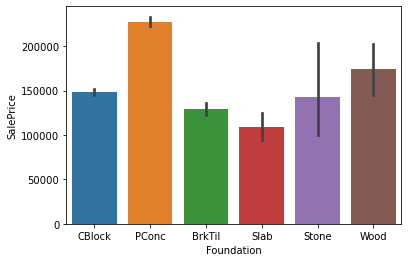

In [70]:
sns.barplot(data = ames, x = 'Foundation', y= 'SalePrice')

# Garage

I'll turn the ordinal data to numeric data, try multiplying condition with quality and see how that looks. Then I'll decide I want to try any dimensional reduction, and if so, how.

In [71]:
garage_feats = ['Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'SalePrice']

sns.scatterplot(data = ames, x = 'Garage Yr Blt', y = 'SalePrice')

The following is more like data cleaning that feature engineering, but I want to do it here because it's small

In [72]:
ames['Garage Yr Blt'] = ames['Garage Yr Blt'].replace('None', 0)
ames['Garage Yr Blt']= ames['Garage Yr Blt'].apply(lambda x : float(x))
amesTest['Garage Yr Blt'] = amesTest['Garage Yr Blt'].replace('None', 0)
amesTest['Garage Yr Blt'] = amesTest['Garage Yr Blt'].apply(lambda x : float(x))

In [73]:
ames['Garage Cars'] = ames['Garage Cars'].replace('None', 0)
ames['Garage Cars']= ames['Garage Cars'].apply(lambda x : float(x))
amesTest['Garage Cars'] = amesTest['Garage Cars'].replace('None', 0)
amesTest['Garage Cars']= amesTest['Garage Cars'].apply(lambda x : float(x))

In [74]:
ames['Garage Area'] = ames['Garage Area'].replace('None', 0)
ames['Garage Area']= ames['Garage Area'].apply(lambda x : float(x))
amesTest['Garage Area'] = amesTest['Garage Area'].replace('None', 0)
amesTest['Garage Area']= amesTest['Garage Area'].apply(lambda x : float(x))

In [75]:
ames['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)

In [76]:
to_numeric = {'None':0, 'Unf':1, 'RFn':2 ,'Fin': 3}
ames['Garage Finish'] = ames['Garage Finish'].replace(to_numeric)
amesTest['Garage Finish'] = amesTest['Garage Finish'].replace(to_numeric)

In [77]:
ames['Garage Qual'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Ex', 'Po'], dtype=object)

In [78]:
to_numeric = {'None':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5}
ames['Garage Qual'] = ames['Garage Qual'].replace(to_numeric)
amesTest['Garage Qual'] = amesTest['Garage Qual'].replace(to_numeric)

In [79]:
ames['Garage Cond'] = ames['Garage Cond'].replace(to_numeric)
amesTest['Garage Cond'] = amesTest['Garage Cond'].replace(to_numeric)

In [80]:
garage_prod = ames[garage_feats].copy()

In [81]:
garage_prod['Garage Qual * Cond'] =  garage_prod['Garage Qual'] * garage_prod['Garage Cond']

<AxesSubplot:xlabel='Garage Qual * Cond', ylabel='SalePrice'>

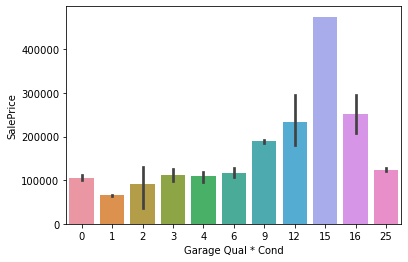

In [82]:
sns.barplot(data = garage_prod, x = 'Garage Qual * Cond', y = 'SalePrice')

In [83]:
garage_prod['Garage QCF'] = garage_prod['Garage Qual * Cond'] * garage_prod['Garage Finish']

<AxesSubplot:xlabel='Garage QCF', ylabel='SalePrice'>

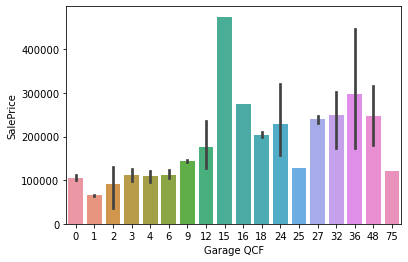

In [84]:
sns.barplot(data = garage_prod, x = 'Garage QCF', y = 'SalePrice')

I don't think I'll use these products. The relatinoship isn't linear enough

<AxesSubplot:xlabel='Garage Type', ylabel='SalePrice'>

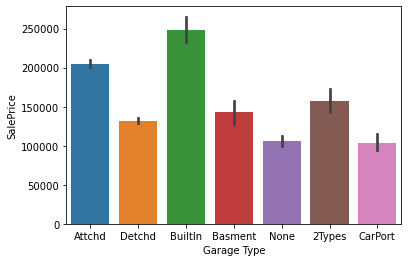

In [85]:
sns.barplot(data = garage_prod, x = 'Garage Type', y = 'SalePrice')

That can only fairly be treated as catagorical. I'm going to do some final cleaning, then start modeling

In [86]:
ames['Kitchen Qual']

0       Gd
1       Gd
2       Gd
3       TA
4       TA
        ..
2046    Gd
2047    TA
2048    TA
2049    TA
2050    Gd
Name: Kitchen Qual, Length: 2051, dtype: object

<AxesSubplot:xlabel='Kitchen Qual', ylabel='SalePrice'>

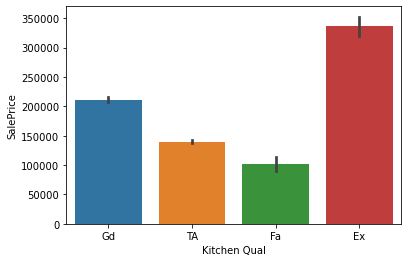

In [87]:
sns.barplot(data = ames, x = 'Kitchen Qual', y= 'SalePrice')

In [88]:
to_numeric = {'Fa':0, 'TA': 1, 'Gd' : 2, 'Ex':3}
ames['Kitchen Qual'] = ames['Kitchen Qual'].replace(to_numeric)
amesTest['Kitchen Qual'] = amesTest['Kitchen Qual'].replace(to_numeric)

In [89]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS SubClass        2051 non-null   int64  
 1   Lot Frontage       2051 non-null   object 
 2   Lot Area           2051 non-null   int64  
 3   Street             2051 non-null   object 
 4   Lot Shape          2051 non-null   object 
 5   Land Contour       2051 non-null   object 
 6   Lot Config         2051 non-null   object 
 7   Condition 1        2051 non-null   object 
 8   Bldg Type          2051 non-null   object 
 9   House Style        2051 non-null   object 
 10  Overall Qual       2051 non-null   int64  
 11  Overall Cond       2051 non-null   int64  
 12  Year Built         2051 non-null   int64  
 13  Year Remod/Add     2051 non-null   int64  
 14  Mas Vnr Type       2051 non-null   object 
 15  Mas Vnr Area       2051 non-null   object 
 16  Foundation         2051 

In [90]:
ames['Pool QC'].unique()

array(['None', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

<AxesSubplot:xlabel='Pool QC', ylabel='SalePrice'>

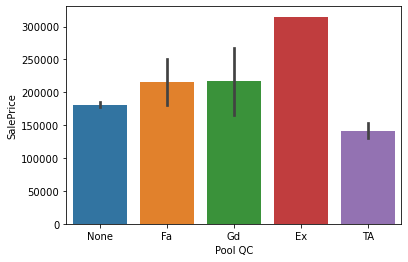

In [91]:
sns.barplot(data = ames, x = 'Pool QC', y = 'SalePrice')

In [92]:
to_numeric = {'None':0, 'TA': 1, 'Fa': 2, 'Gd' : 3, 'Ex':4}
ames['Pool QC'] = ames['Pool QC'].replace(to_numeric)
amesTest['Pool QC'] = amesTest['Pool QC'].replace(to_numeric)

In [93]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS SubClass        2051 non-null   int64  
 1   Lot Frontage       2051 non-null   object 
 2   Lot Area           2051 non-null   int64  
 3   Street             2051 non-null   object 
 4   Lot Shape          2051 non-null   object 
 5   Land Contour       2051 non-null   object 
 6   Lot Config         2051 non-null   object 
 7   Condition 1        2051 non-null   object 
 8   Bldg Type          2051 non-null   object 
 9   House Style        2051 non-null   object 
 10  Overall Qual       2051 non-null   int64  
 11  Overall Cond       2051 non-null   int64  
 12  Year Built         2051 non-null   int64  
 13  Year Remod/Add     2051 non-null   int64  
 14  Mas Vnr Type       2051 non-null   object 
 15  Mas Vnr Area       2051 non-null   object 
 16  Foundation         2051 

In [94]:
ames['Lot Frontage']=ames['Lot Frontage'].replace('None' , 0)
amesTest['Lot Frontage']=amesTest['Lot Frontage'].replace('None' , 0)

In [95]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS SubClass        2051 non-null   int64  
 1   Lot Frontage       2051 non-null   float64
 2   Lot Area           2051 non-null   int64  
 3   Street             2051 non-null   object 
 4   Lot Shape          2051 non-null   object 
 5   Land Contour       2051 non-null   object 
 6   Lot Config         2051 non-null   object 
 7   Condition 1        2051 non-null   object 
 8   Bldg Type          2051 non-null   object 
 9   House Style        2051 non-null   object 
 10  Overall Qual       2051 non-null   int64  
 11  Overall Cond       2051 non-null   int64  
 12  Year Built         2051 non-null   int64  
 13  Year Remod/Add     2051 non-null   int64  
 14  Mas Vnr Type       2051 non-null   object 
 15  Mas Vnr Area       2051 non-null   object 
 16  Foundation         2051 

In [106]:
ames.to_pickle('../datasets/pickles/TrainForModel.pkl')

Fix Numeric data that I turned into object data earlier

In [105]:
def fix_numeric(column):

    ames[column] = ames[column].replace('None', 0)
    ames[column] = ames[column].apply(lambda x : float(x))
for column in ames.columns:
    
    if str(ames[column].dtype) == 'object': 
        try:
            fix_numeric(column)
        except:
            pass

<AxesSubplot:xlabel='Bsmt Exposure', ylabel='SalePrice'>

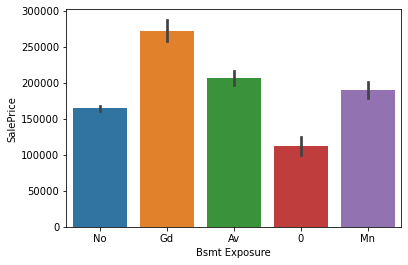

In [104]:
sns.barplot(data = ames, x ='Bsmt Exposure', y = 'SalePrice')